## Toy example of a baseline model

In [2]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [3]:
#hide
from fastai.vision.all import *
from fastbook import *

matplotlib.rc('image', cmap='Greys')

*Create zeros and ones tensors*

In [4]:
path_train = Path("""/notebooks/storage/Anand/train_anand""")

In [5]:
#Storing the file paths of the handwritten 0s and 1s

In [6]:
zeros_train = (path_train/'0').ls().sorted()

In [7]:
ones_train = (path_train/'1').ls().sorted()

Sample image for screenshot 

In [8]:
im0_path = zeros_train[200]
im0 = Image.open(im0_path)
im0_t = tensor(im0)
df = pd.DataFrame(im0_t)
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50,165,191,191,191,72,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,17,22,22,66,246,253,234,246,253,251,119,2,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,27,127,233,253,253,253,254,170,7,57,128,254,253,118,0,0,0,0,0
9,0,0,0,0,0,0,0,0,54,229,254,253,253,253,253,237,37,0,0,0,60,227,250,115,0,0,0,0


In [9]:
im1_path = ones_train[1000]
im1 = Image.open(im1_path)
im1_t = tensor(im1)
df = pd.DataFrame(im1_t)
df.style.set_properties(**{'font-size':'6pt'}).background_gradient('Greys')

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,206,131,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,12,221,254,42,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,205,254,73,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,205,254,185,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,205,254,227,16,0,0,0,0,0,0,0,0,0,0,0,0


### list comprehension 

In [11]:
#Storing the images as a list of tensors (using list comprehension)

In [10]:
zero_tensors_train = [tensor(Image.open(o)) for o in zeros_train]
one_tensors_train = [tensor(Image.open(o)) for o in ones_train]

In [11]:
len(zero_tensors_train),len(one_tensors_train)

(5923, 6742)

In [12]:
type(zero_tensors_train)

list

In [13]:
#combine all the images in this list to form a rank-3 tensor
#this will help us perform functions like taking averages

In [13]:
stacked_zeros_train = torch.stack(zero_tensors_train).float()/255
stacked_ones_train = torch.stack(one_tensors_train).float()/255

In [14]:
stacked_zeros_train.shape

torch.Size([5923, 28, 28])

In [15]:
stacked_ones_train.shape

torch.Size([6742, 28, 28])

In [45]:
#perform step 1 of the algorithm: Take the average pixel value for #every pixel of the handwritten 0's. The resultant group average is #the "ideal" 0

In [16]:
mean0 = stacked_zeros_train.mean(0)

In [ ]:
#perform step 2 of the algorithm: Take the average pixel value for #every pixel of the handwritten 1's. The resultant group average is #the "ideal" 1

In [17]:
mean1 = stacked_ones_train.mean(0)

<AxesSubplot:>

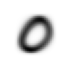

In [18]:
show_image(mean0)

<AxesSubplot:>

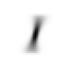

In [19]:
show_image(mean1)

## Eyeballing the results of the baseline model

In [20]:
random0 = stacked_zeros_train[89]

<AxesSubplot:>

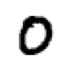

In [21]:
show_image(random0)

In [60]:
#distance between random 0 and ideal 0

In [22]:
F.mse_loss(random0,mean0).sqrt()

tensor(0.2214)

In [62]:
#distance between random 1 and ideal 1

In [23]:
F.mse_loss(random0,mean1).sqrt()

tensor(0.4259)

# Assessing the baseline model - a quick and dirty approach

distance between the random 0 and ideal 0 is 0.1445450484752655
distance between the random 0 and ideal 1 is 0.21878810226917267
The randomly selected 0 is


<AxesSubplot:>

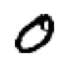

In [24]:
random0 = stacked_zeros_train[11]
print("distance between the random 0 and ideal 0 is", (random0-mean0).abs().mean().item())
print("distance between the random 0 and ideal 1 is", (random0-mean1).abs().mean().item())
print ("The randomly selected 0 is")
show_image(random0)

# Trial -- not used for blog

<AxesSubplot:>

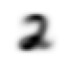

In [10]:
path_12 = Path("""/notebooks/storage/data/mnist_png/training""")

twos_train = (path_12/'2').ls().sorted()

twos_tensors_train = [tensor(Image.open(o)) for o in twos_train]

stacked_twos_train = torch.stack(twos_tensors_train).float()/255

mean2 = stacked_twos_train.mean(0)

show_image(mean2)


## Assessing the baseline model - an analytical approach to calculate its Accuracy

In [25]:
path_validate = Path("""/notebooks/storage/Anand/test_anand""")
zeros_validate = (path_validate/'0').ls().sorted()
ones_validate = (path_validate/'1').ls().sorted()

zero_tensors_validate = [tensor(Image.open(o)) for o in zeros_validate]
one_tensors_validate = [tensor(Image.open(o)) for o in ones_validate]

stacked_zeros_validate = torch.stack(zero_tensors_validate).float()/255
stacked_ones_validate = torch.stack(one_tensors_validate).float()/255

In [26]:
def distance_between1 (a,b): 
    return (a-b).abs().mean((-1,-2))

In [27]:
def is_0(x): 
    return distance_between1(x,mean0) < distance_between1(x,mean1)

In [28]:
#def is_1(x): 
#    return distance_between1(x,mean1) < distance_between1(x,mean0)

In [31]:
accuracy_0s = is_0(stacked_zeros_validate).float().mean()
#accuracy_1s = is_1(stacked_ones_validate).float().mean()
accuracy_1s = (1- is_0(stacked_ones_validate).float()).mean()

In [34]:
print("Accuracy of the baseline model is",((accuracy_0s+accuracy_1s)/2).item())

Accuracy of the baseline model is 0.9505102038383484
